In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
lineitems = pd.read_csv('lineitems_sample.csv')
#lineitems.isna().sum()
lineitems.category.value_counts()

FRUIT_VEG               200880
DAIRY                   184139
CONFECTIONARY           171323
GROCERY_FOOD            164854
GROCERY_HEALTH_PETS     123198
BAKERY                  114874
NEWSPAPERS_MAGAZINES     74733
PREPARED_MEALS           64722
SOFT_DRINKS              60725
FROZEN                   59106
MEAT                     56849
TOBACCO                  49506
DRINKS                   37470
DELI                     30788
WORLD_FOODS              28010
LOTTERY                  16668
CASHPOINT                10103
SEASONAL_GIFTING          6799
DISCOUNT_BAKERY           3771
PRACTICAL_ITEMS           2797
Name: category, dtype: int64

In [ ]:
baskets = pd.read_csv('baskets_sample.csv')
#baskets.isna().sum()
baskets

customer_number        purchase_time  basket_quantity basket_spend  \
0                 11911  2007-03-01 07:06:00                7        £3.09   
1                  4047  2007-03-01 07:13:00                9        £7.99   
2                  3571  2007-03-01 07:27:00                9       £37.06   
3                  4079  2007-03-01 07:34:00               11       £11.91   
4                  6063  2007-03-01 07:36:00                3        £1.45   
...                 ...                  ...              ...          ...   
195542             5107  2007-08-31 21:40:00                6        £9.66   
195543             1988  2007-08-31 21:45:00               12       £14.98   
195544             3028  2007-08-31 21:46:00                6        £6.21   
195545             7191  2007-08-31 21:46:00                7        £6.30   
195546            10107  2007-08-31 21:55:00               12        £8.03   

        basket_categories  
0                       3  
1                       5  
2                       6  
3                       5  
4                       1  
...                   ...  
195542                  3  
195543                  6  
195544                  2  
195545                  3  
195546                  6  

[195547 rows x 5 columns]

In [ ]:
freq = baskets.groupby('customer_number')['purchase_time'].count()
baskets_freq = pd.DataFrame(freq).reset_index()
baskets_freq.columns = ['customer_number','frequency']

In [ ]:
categorySpends = pd.read_csv('category_spends_sample.csv')
#categorySpends.isna().sum()
categorySpends

customer_number fruit_veg    dairy confectionary grocery_food  \
0               11387    £64.58   £35.91       £107.78       £27.08   
1                8171    £16.89   £37.24        £28.84       £33.43   
2                1060    £87.30   £82.98        £49.88       £20.57   
3                3728    £84.05  £186.56       £175.50      £119.84   
4               14621    £35.16  £121.31        £79.23       £29.03   
...               ...       ...      ...           ...          ...   
2995            12541    £64.52   £73.84        £89.36      £135.31   
2996            16081     £5.91   £18.08        £18.32       £23.69   
2997             7094   £116.54  £106.08        £42.31       £35.92   
2998             3457     £3.68   £13.44        £21.96       £10.10   
2999             6647    £78.65   £47.23        £40.78       £52.82   

     grocery_health_pets bakery newspapers_magazines prepared_meals  \
0                 £29.59  £0.00               £54.83          £6.35   
1                 £66.40  £0.00               £22.06         £12.09   
2                 £37.04  £0.00                £9.85         £57.98   
3                £111.08  £0.00               £13.05         £25.54   
4                 £37.17  £0.00               £40.06          £0.00   
...                  ...    ...                  ...            ...   
2995              £61.99  £0.00                £0.00         £61.02   
2996              £16.12  £0.00                £5.39         £15.96   
2997              £43.59  £0.00               £13.68          £1.78   
2998              £12.51  £0.00                £4.75          £1.04   
2999              £89.21  £0.00                £1.41         £37.50   

     soft_drinks  ...    meat  tobacco  drinks    deli world_foods lottery  \
0         £22.83  ...  £28.62  £162.10  £28.02  £28.12      £28.54   £2.00   
1          £2.34  ...  £26.44    £0.00   £8.42   £2.65       £3.76   £0.00   
2         £31.12  ...  £54.65    £0.00   £0.00   £2.60       £0.00  £18.00   
3        £124.42  ...   £0.95  £127.70   £0.00   £0.00       £0.00   £4.00   
4          £4.68  ...  £36.24    £0.00   £2.55  £99.16       £0.00   £0.00   
...          ...  ...     ...      ...     ...     ...         ...     ...   
2995      £56.62  ...  £58.78   £36.57   £0.00   £0.00       £3.36   £0.00   
2996       £0.67  ...   £0.00   £50.54   £0.00   £7.73       £9.74  £30.00   
2997      £21.44  ...  £21.51    £0.00   £7.65   £4.10       £2.59   £0.00   
2998       £4.33  ...   £4.66    £0.00   £0.00   £8.27       £1.65   £0.00   
2999      £13.55  ...  £78.19  £204.41  £17.01   £1.80       £0.00   £0.00   

     cashpoint seasonal_gifting discount_bakery practical_items  
0       £15.00            £7.48           £0.00           £0.84  
1        £0.00            £9.99           £0.00           £0.00  
2       £20.00          £106.46           £0.00           £0.00  
3        £0.00            £0.00           £0.00           £4.50  
4        £0.00            £3.40           £0.00           £0.00  
...        ...              ...             ...             ...  
2995     £0.00            £0.00           £0.00           £2.53  
2996     £0.00            £0.00           £0.00           £1.61  
2997     £0.00            £0.00           £0.00           £6.79  
2998     £0.00            £1.98           £0.00           £0.00  
2999   £235.00            £0.00           £0.00           £0.00  

[3000 rows x 21 columns]

In [ ]:
customersSample = pd.read_csv('customers_sample.csv')
#customersSample.isna().sum()
customersSample
#customersSample[customersSample['total_quantity'] > np.mean(customersSample.total_quantity)]

customer_number  baskets  total_quantity  average_quantity total_spend  \
0                4749      220             260          1.181818     £631.12   
1                4757      248             333          1.342742     £452.42   
2                 144      226             303          1.340708     £261.16   
3                 572      285             346          1.214035     £638.79   
4                 669      285             324          1.136842     £561.42   
...               ...      ...             ...               ...         ...   
2995             3583      598             705          1.178930     £619.83   
2996             6434      635             695          1.094488     £877.16   
2997             9778     1147            1466          1.278117   £1,754.97   
2998             8639      262             275          1.049618     £332.89   
2999            10805      256             289          1.128906     £353.04   

     average_spend  
0            £2.87  
1            £1.82  
2            £1.16  
3            £2.24  
4            £1.97  
...            ...  
2995         £1.04  
2996         £1.38  
2997         £1.53  
2998         £1.27  
2999         £1.38  

[3000 rows x 6 columns]

In [ ]:
finalDataSet = categorySpends.merge(customersSample, on='customer_number', how='outer')

In [ ]:
lineitems
lineitems_bakery= lineitems[lineitems['category']=='BAKERY']
lineitems_bakery

customer_number        purchase_time  product_id category  quantity  \
3                   2649  2007-03-12 16:05:00       34890   BAKERY         1   
4                    859  2007-03-10 09:53:00      613984   BAKERY         1   
17                  5080  2007-03-14 17:27:00       35179   BAKERY         1   
18                 10743  2007-03-28 10:14:00       33631   BAKERY         1   
37                 10426  2007-03-28 11:20:00      302361   BAKERY         1   
...                  ...                  ...         ...      ...       ...   
1179887            15772  2007-08-13 17:08:00      743109   BAKERY         1   
1179888             6344  2007-08-14 12:04:00      743109   BAKERY         1   
1179889             2645  2007-08-11 14:28:00      743109   BAKERY         1   
1179890             2645  2007-08-09 14:55:00      743109   BAKERY         1   
1179891             3844  2007-08-21 15:50:00      743151   BAKERY         1   

         spend  
3        £0.57  
4        £1.59  
17       £0.89  
18       £1.55  
37       £0.89  
...        ...  
1179887  £1.49  
1179888  £1.45  
1179889  £1.45  
1179890  £1.45  
1179891  £1.14  

[114874 rows x 6 columns]

In [ ]:
lineitems_bakery['spend'] = lineitems_bakery['spend'].replace({'£':''}, regex=True)

<ipython-input-9-f73a078d8c01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineitems_bakery['spend'] = lineitems_bakery['spend'].replace({'£':''}, regex=True)


In [ ]:
lineitems_bakery['spend'] = pd.to_numeric(lineitems_bakery['spend'])

lineitems_bakery['Bakery_spend'] = lineitems_bakery['spend']
totalBakerySpend = lineitems_bakery.groupby('customer_number')['Bakery_spend'].sum()
totalBakerySpend = pd.DataFrame(totalBakerySpend).reset_index()
totalBakerySpend.columns = ['customer_number','Bakery_spend']

<ipython-input-10-6c4bb98b42e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineitems_bakery['spend'] = pd.to_numeric(lineitems_bakery['spend'])
<ipython-input-10-6c4bb98b42e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineitems_bakery['Bakery_spend'] = lineitems_bakery['spend']


In [ ]:
finalDataSet = finalDataSet.merge(totalBakerySpend, on='customer_number', how='outer')

In [ ]:
finalDataSet

customer_number fruit_veg    dairy confectionary grocery_food  \
0               11387    £64.58   £35.91       £107.78       £27.08   
1                8171    £16.89   £37.24        £28.84       £33.43   
2                1060    £87.30   £82.98        £49.88       £20.57   
3                3728    £84.05  £186.56       £175.50      £119.84   
4               14621    £35.16  £121.31        £79.23       £29.03   
...               ...       ...      ...           ...          ...   
2995            12541    £64.52   £73.84        £89.36      £135.31   
2996            16081     £5.91   £18.08        £18.32       £23.69   
2997             7094   £116.54  £106.08        £42.31       £35.92   
2998             3457     £3.68   £13.44        £21.96       £10.10   
2999             6647    £78.65   £47.23        £40.78       £52.82   

     grocery_health_pets bakery newspapers_magazines prepared_meals  \
0                 £29.59  £0.00               £54.83          £6.35   
1                 £66.40  £0.00               £22.06         £12.09   
2                 £37.04  £0.00                £9.85         £57.98   
3                £111.08  £0.00               £13.05         £25.54   
4                 £37.17  £0.00               £40.06          £0.00   
...                  ...    ...                  ...            ...   
2995              £61.99  £0.00                £0.00         £61.02   
2996              £16.12  £0.00                £5.39         £15.96   
2997              £43.59  £0.00               £13.68          £1.78   
2998              £12.51  £0.00                £4.75          £1.04   
2999              £89.21  £0.00                £1.41         £37.50   

     soft_drinks  ... cashpoint seasonal_gifting discount_bakery  \
0         £22.83  ...    £15.00            £7.48           £0.00   
1          £2.34  ...     £0.00            £9.99           £0.00   
2         £31.12  ...    £20.00          £106.46           £0.00   
3        £124.42  ...     £0.00            £0.00           £0.00   
4          £4.68  ...     £0.00            £3.40           £0.00   
...          ...  ...       ...              ...             ...   
2995      £56.62  ...     £0.00            £0.00           £0.00   
2996       £0.67  ...     £0.00            £0.00           £0.00   
2997      £21.44  ...     £0.00            £0.00           £0.00   
2998       £4.33  ...     £0.00            £1.98           £0.00   
2999      £13.55  ...   £235.00            £0.00           £0.00   

     practical_items baskets total_quantity average_quantity total_spend  \
0              £0.84     491            545         1.109980     £697.76   
1              £0.00     267            330         1.235955     £369.31   
2              £0.00     384            432         1.125000     £668.68   
3              £4.50     725           1010         1.393103   £1,104.10   
4              £0.00     676            760         1.124260     £524.45   
...              ...     ...            ...              ...         ...   
2995           £2.53     764            851         1.113874     £800.43   
2996           £1.61     193            209         1.082902     £222.26   
2997           £6.79     326            354         1.085890     £448.42   
2998           £0.00     147            157         1.068027     £115.90   
2999           £0.00     424            490         1.155660     £929.59   

     average_spend Bakery_spend  
0            £1.42        26.58  
1            £1.38        20.02  
2            £1.74        75.72  
3            £1.52       111.67  
4            £0.78        33.13  
...            ...          ...  
2995         £1.05        61.31  
2996         £1.15        17.51  
2997         £1.38        21.55  
2998         £0.79        19.34  
2999         £2.19        13.14  

[3000 rows x 27 columns]

In [ ]:
finalDataSet = finalDataSet.drop(columns = 'bakery')
finalDataSet = finalDataSet.merge(baskets_freq, on='customer_number', how='outer')

In [ ]:
#Converting string values to numeric - Data cleansing
for i in finalDataSet.columns:
  finalDataSet[i] = finalDataSet[i].replace({'£':''}, regex=True)
  finalDataSet[i] = finalDataSet[i].replace({',':''}, regex=True)
  finalDataSet[i] = pd.to_numeric(finalDataSet[i])


In [ ]:
#Deriving new feature to calculate average quantity of items purchased in each basket
finalDataSet['average_quantity_new'] = (finalDataSet['total_quantity']/finalDataSet['frequency']).round(2)

In [ ]:
#Deriving new feature to calculate average amount spent per basket
finalDataSet['average_spend_new'] = (finalDataSet['total_spend']/finalDataSet['frequency']).round(2)

In [ ]:
#Dropping correlated features like baskets, average_quantity, average_spend and lottery
finalDataSet = finalDataSet.drop(columns = ['baskets', 'average_quantity', 'average_spend', 'lottery'])

In [ ]:
finalDataSet.columns

Index(['customer_number', 'fruit_veg', 'dairy', 'confectionary',
       'grocery_food', 'grocery_health_pets', 'newspapers_magazines',
       'prepared_meals', 'soft_drinks', 'frozen', 'meat', 'tobacco', 'drinks',
       'deli', 'world_foods', 'cashpoint', 'seasonal_gifting',
       'discount_bakery', 'practical_items', 'total_quantity', 'total_spend',
       'Bakery_spend', 'frequency', 'average_quantity_new',
       'average_spend_new'],
      dtype='object')

In [ ]:
#Calculating recency
baskets['Date']= pd.to_datetime(baskets['purchase_time'])
# keep only the most recent date of purchase
baskets['rank'] = baskets.sort_values(['customer_number','Date']).groupby(['customer_number'])['Date'].rank(method='min').astype(int)
baskets_rec = baskets[baskets['rank']==1]

In [ ]:
baskets_rec['recency'] = (baskets_rec['Date'] - pd.to_datetime(min(baskets_rec['Date']))).dt.days

<ipython-input-22-b68ef01cb9e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baskets_rec['recency'] = (baskets_rec['Date'] - pd.to_datetime(min(baskets_rec['Date']))).dt.days


In [ ]:
finalDataSet = finalDataSet.merge(baskets_rec, on='customer_number', how='outer')

In [ ]:
finalDataSet = finalDataSet.drop(columns = ['purchase_time', 'Date', 'rank','total_quantity', 'total_spend', 'basket_spend', 'basket_categories', 'basket_quantity'])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
finalDataSet

customer_number  fruit_veg   dairy  confectionary  grocery_food  \
0               11387      64.58   35.91         107.78         27.08   
1                8171      16.89   37.24          28.84         33.43   
2                1060      87.30   82.98          49.88         20.57   
3                3728      84.05  186.56         175.50        119.84   
4               14621      35.16  121.31          79.23         29.03   
...               ...        ...     ...            ...           ...   
2995            12541      64.52   73.84          89.36        135.31   
2996            16081       5.91   18.08          18.32         23.69   
2997             7094     116.54  106.08          42.31         35.92   
2998             3457       3.68   13.44          21.96         10.10   
2999             6647      78.65   47.23          40.78         52.82   

      grocery_health_pets  newspapers_magazines  prepared_meals  soft_drinks  \
0                   29.59                 54.83            6.35        22.83   
1                   66.40                 22.06           12.09         2.34   
2                   37.04                  9.85           57.98        31.12   
3                  111.08                 13.05           25.54       124.42   
4                   37.17                 40.06            0.00         4.68   
...                   ...                   ...             ...          ...   
2995                61.99                  0.00           61.02        56.62   
2996                16.12                  5.39           15.96         0.67   
2997                43.59                 13.68            1.78        21.44   
2998                12.51                  4.75            1.04         4.33   
2999                89.21                  1.41           37.50        13.55   

      frozen  ...  world_foods  cashpoint  seasonal_gifting  discount_bakery  \
0      21.51  ...        28.54       15.0              7.48              0.0   
1      78.74  ...         3.76        0.0              9.99              0.0   
2      14.53  ...         0.00       20.0            106.46              0.0   
3      15.24  ...         0.00        0.0              0.00              0.0   
4       3.33  ...         0.00        0.0              3.40              0.0   
...      ...  ...          ...        ...               ...              ...   
2995   95.22  ...         3.36        0.0              0.00              0.0   
2996    0.99  ...         9.74        0.0              0.00              0.0   
2997    2.89  ...         2.59        0.0              0.00              0.0   
2998    8.19  ...         1.65        0.0              1.98              0.0   
2999   18.89  ...         0.00      235.0              0.00              0.0   

      practical_items  Bakery_spend  frequency  average_quantity_new  \
0                0.84         26.58         64                  8.52   
1                0.00         20.02         50                  6.60   
2                0.00         75.72         40                 10.80   
3                4.50        111.67         51                 19.80   
4                0.00         33.13         90                  8.44   
...               ...           ...        ...                   ...   
2995             2.53         61.31         82                 10.38   
2996             1.61         17.51         51                  4.10   
2997             6.79         21.55         20                 17.70   
2998             0.00         19.34         32                  4.91   
2999             0.00         13.14         76                  6.45   

      average_spend_new  recency  
0                 10.90        0  
1                  7.39        1  
2                 16.72        1  
3                 21.65        0  
4                  5.83        1  
...                 ...      ...  
2995               9.76        0  
2996               4.36        8  
2997              22.42    

In [ ]:
finalDataSet.isna().sum()

finalDataSet['Bakery_spend'] = finalDataSet['Bakery_spend'].fillna(0)

In [ ]:
finalDataSet_corr = finalDataSet.corr(method="pearson").round(2)

plt.figure(figsize=(20, 20),dpi=600)
g=sns.heatmap(finalDataSet_corr,annot=True);
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
scalar = StandardScaler()
scaled_finalDataSet = pd.DataFrame(scalar.fit_transform(finalDataSet)) 
scaled_finalDataSet.shape

(3000, 24)

In [ ]:
scaled_finalDataSet.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64

In [ ]:
scaled_finalDataSet_corr = scaled_finalDataSet.corr(method="pearson").round(2)

plt.figure(figsize=(20, 20),dpi=600)
g=sns.heatmap(scaled_finalDataSet_corr,annot=True);
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

In [ ]:
scaled_finalDataSet = scaled_finalDataSet.dropna(axis=1, how='all')

Text(0.5, 0, 'Boxplots of product category variables')

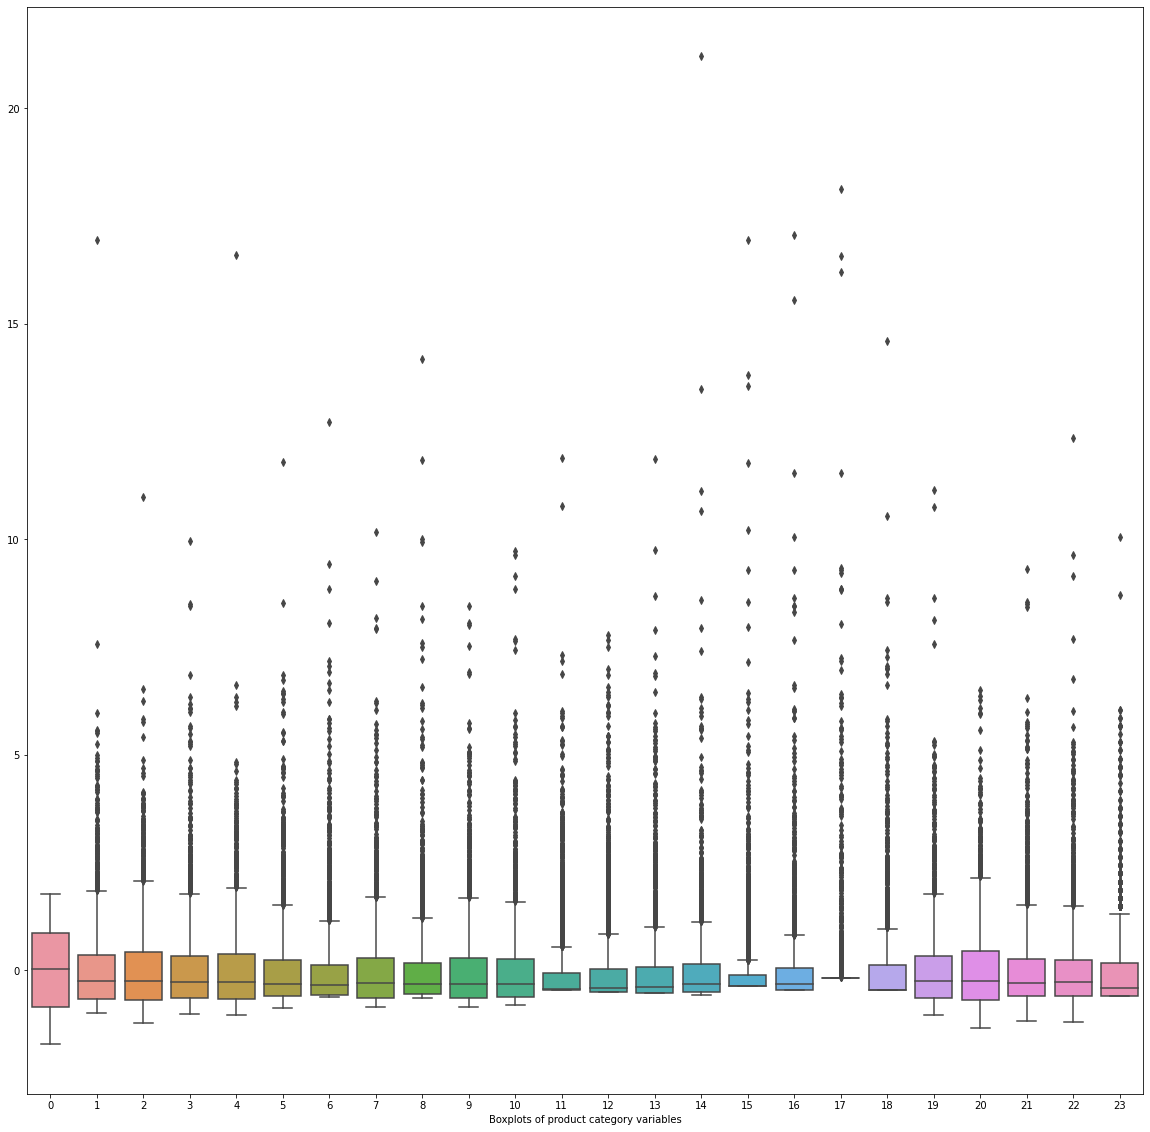

In [ ]:
fig, ax= plt.subplots(figsize=(20, 20))
boxplots= sns.boxplot(data = scaled_finalDataSet)
plt.xlabel('Boxplots of product category variables')

In [ ]:
scaled_finalDataSet.shape

(3000, 24)

In [ ]:
pca = PCA()
pca.fit(scaled_finalDataSet)

PCA()

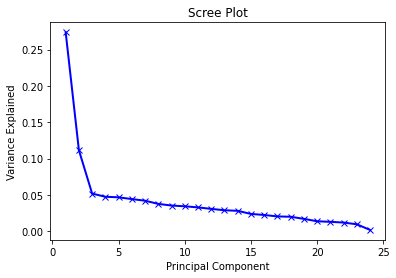

In [ ]:
#Plotting elbow curve to identify number of Principal Component
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'x-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
#Creating a PCA object with number of components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_finalDataSet)
pca.explained_variance_ratio_

array([0.27388203, 0.11152971, 0.05170939])

In [ ]:
data_pca = pca.transform(scaled_finalDataSet)
data_pca.shape

(3000, 3)

In [ ]:
wcss= []
for i in range(1,21):
    kmeansPca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeansPca.fit(data_pca)
    wcss.append(kmeansPca.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

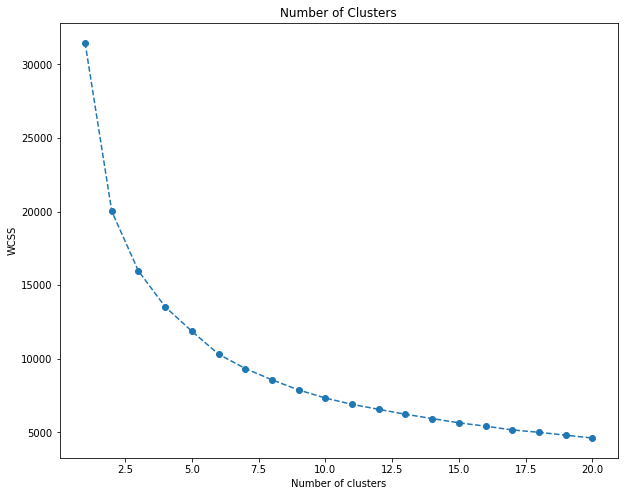

In [ ]:
#Plotting an elbow curve to identify right number of clusters
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Number of Clusters')
plt.show()

In [ ]:
#Calculating silhouette score to find out number of clusters
from sklearn.metrics import silhouette_score

k = 6
clusterer = KMeans(n_clusters=k)
clusterer.fit(data_pca)
preds = clusterer.predict(data_pca)
    
#-- Calculate a silhouette score for the 3 segment solution
score = silhouette_score(data_pca, preds, metric='euclidean')
print("For n_clusters = {}. The average silhouette_score is : {})".format(k, score))

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6. The average silhouette_score is : 0.28789748540217286)


In [ ]:
range_n_clusters = list(range(2, 8))
print(range_n_clusters)

# Loop through clusters
for n_clusters in range_n_clusters:
    # TO DO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters = n_clusters).fit(data_pca)

    # TO DO: Predict the cluster for each data point
    preds = clusterer.predict(data_pca)

    # TO DO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TO DO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(data_pca, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {})".format(n_clusters, score))
    

[2, 3, 4, 5, 6, 7]


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2. The average silhouette_score is : 0.48434377463408934)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3. The average silhouette_score is : 0.31024777926978725)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4. The average silhouette_score is : 0.3169316131002673)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5. The average silhouette_score is : 0.32011488778636554)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6. The average silhouette_score is : 0.2810756915828036)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7. The average silhouette_score is : 0.27855077339312406)


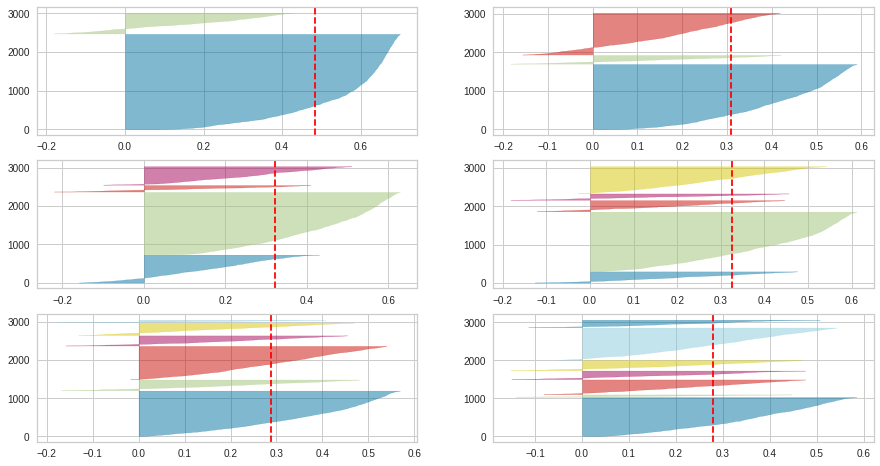

In [ ]:
#Evaluating silhouette score
from yellowbrick.cluster import SilhouetteVisualizer

# Load the IRIS dataset
  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_pca) 

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


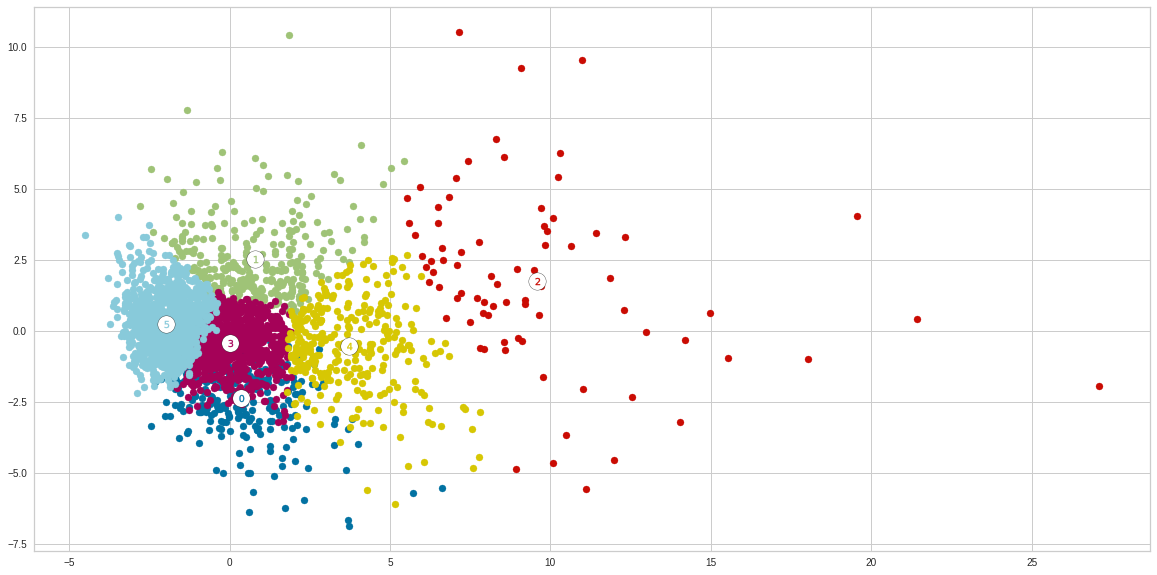

In [ ]:
#Plotting the clusters

data_pca_df = pd.DataFrame(data_pca)

clusterer = KMeans(n_clusters=6).fit(data_pca_df)
preds = clusterer.predict(data_pca_df)
centres = clusterer.cluster_centers_

# preds = clusterer.predict(data_pca_df)
# centres = clusterer.cluster_centers_

# #-- Put the predictions into a pandas dataframe format
assignments = pd.DataFrame(preds, columns = ['Cluster'])

# #-- Put the predictions into a pandas dataframe format
plot_data = pd.concat([assignments, data_pca_df], axis = 1)
#plot_data = pd.concat([assignments, data_pca_df], axis = 1)

#plot_data

# #-- Color the points based on assigned cluster (n.b scatter will do this for us automatically)
plt.rcParams['figure.figsize'] = (20,10)

for i, c in plot_data.groupby('Cluster'):  
    plt.scatter(c[0], c[1])

# #-- Plot where the cluster centers are
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i), alpha = 1, s=50);

In [ ]:
finalDataSet

customer_number  fruit_veg   dairy  confectionary  grocery_food  \
0               11387      64.58   35.91         107.78         27.08   
1                8171      16.89   37.24          28.84         33.43   
2                1060      87.30   82.98          49.88         20.57   
3                3728      84.05  186.56         175.50        119.84   
4               14621      35.16  121.31          79.23         29.03   
...               ...        ...     ...            ...           ...   
2995            12541      64.52   73.84          89.36        135.31   
2996            16081       5.91   18.08          18.32         23.69   
2997             7094     116.54  106.08          42.31         35.92   
2998             3457       3.68   13.44          21.96         10.10   
2999             6647      78.65   47.23          40.78         52.82   

      grocery_health_pets  newspapers_magazines  prepared_meals  soft_drinks  \
0                   29.59                 54.83            6.35        22.83   
1                   66.40                 22.06           12.09         2.34   
2                   37.04                  9.85           57.98        31.12   
3                  111.08                 13.05           25.54       124.42   
4                   37.17                 40.06            0.00         4.68   
...                   ...                   ...             ...          ...   
2995                61.99                  0.00           61.02        56.62   
2996                16.12                  5.39           15.96         0.67   
2997                43.59                 13.68            1.78        21.44   
2998                12.51                  4.75            1.04         4.33   
2999                89.21                  1.41           37.50        13.55   

      frozen  ...  world_foods  cashpoint  seasonal_gifting  discount_bakery  \
0      21.51  ...        28.54       15.0              7.48              0.0   
1      78.74  ...         3.76        0.0              9.99              0.0   
2      14.53  ...         0.00       20.0            106.46              0.0   
3      15.24  ...         0.00        0.0              0.00              0.0   
4       3.33  ...         0.00        0.0              3.40              0.0   
...      ...  ...          ...        ...               ...              ...   
2995   95.22  ...         3.36        0.0              0.00              0.0   
2996    0.99  ...         9.74        0.0              0.00              0.0   
2997    2.89  ...         2.59        0.0              0.00              0.0   
2998    8.19  ...         1.65        0.0              1.98              0.0   
2999   18.89  ...         0.00      235.0              0.00              0.0   

      practical_items  Bakery_spend  frequency  average_quantity_new  \
0                0.84         26.58         64                  8.52   
1                0.00         20.02         50                  6.60   
2                0.00         75.72         40                 10.80   
3                4.50        111.67         51                 19.80   
4                0.00         33.13         90                  8.44   
...               ...           ...        ...                   ...   
2995             2.53         61.31         82                 10.38   
2996             1.61         17.51         51                  4.10   
2997             6.79         21.55         20                 17.70   
2998             0.00         19.34         32                  4.91   
2999             0.00         13.14         76                  6.45   

      average_spend_new  recency  
0                 10.90        0  
1                  7.39        1  
2                 16.72        1  
3                 21.65        0  
4                  5.83        1  
...                 ...      ...  
2995               9.76        0  
2996               4.36        8  
2997              22.42    

In [ ]:
log_centres = pca.inverse_transform(centres)

# TO DO: Exponentiate the centres
true_centres = np.exp(log_centres)

#-- Display the true centres
segments = ['Segment {}'.format(i) for i in range(0, len(centres))]
true_centres = pd.DataFrame(np.round(true_centres), columns = finalDataSet.columns)
true_centres.index = segments
print(true_centres)

           customer_number  fruit_veg  dairy  confectionary  grocery_food  \
Segment 0              2.0        1.0    1.0            1.0           1.0   
Segment 1              1.0        1.0    1.0            1.0           1.0   
Segment 2              1.0       16.0   18.0           18.0          21.0   
Segment 3              1.0        1.0    1.0            1.0           1.0   
Segment 4              1.0        3.0    3.0            3.0           3.0   
Segment 5              1.0        1.0    1.0            1.0           1.0   

           grocery_health_pets  newspapers_magazines  prepared_meals  \
Segment 0                  1.0                   2.0             1.0   
Segment 1                  1.0                   1.0             1.0   
Segment 2                 19.0                   2.0            12.0   
Segment 3                  1.0                   1.0             1.0   
Segment 4                  3.0                   2.0             3.0   
Segment 5                  1

In [ ]:
#Describing the clusters

final_assigments = pd.concat([assignments, finalDataSet], axis = 1)

#-- Create a loop that describes summary statistics for each segment
for c, d in final_assigments.groupby('Cluster'):  
    print("Segment", c+1)
    display(d.describe())

Segment 1


Cluster  customer_number   fruit_veg       dairy  confectionary  \
count    278.0       278.000000  278.000000  278.000000     278.000000   
mean       0.0      8590.039568   56.667374   75.149532      59.805072   
std        0.0      3808.220929   41.929969   44.380142      41.343336   
min        0.0       445.000000    0.000000    0.000000       1.060000   
25%        0.0      5501.250000   24.447500   43.895000      29.752500   
50%        0.0      8735.500000   46.530000   67.895000      52.655000   
75%        0.0     11060.500000   79.912500   95.742500      82.197500   
max        0.0     16292.000000  206.080000  271.980000     254.110000   

       grocery_food  grocery_health_pets  newspapers_magazines  \
count    278.000000           278.000000            278.000000   
mean      54.169748            61.541691             39.745180   
std       37.643790            48.677808             46.523129   
min        2.150000             0.000000              0.000000   
25%       25.415000            26.195000              8.827500   
50%       45.765000            51.985000             25.280000   
75%       75.227500            79.335000             52.375000   
max      216.640000           306.040000            351.730000   

       prepared_meals  soft_drinks  ...  world_foods    cashpoint  \
count      278.000000   278.000000  ...   278.000000   278.000000   
mean        33.573993    37.399173  ...     7.381151   191.966403   
std         29.178398    42.174324  ...    10.590957   301.589966   
min          0.000000     0.000000  ...     0.000000     0.000000   
25%         12.765000     6.390000  ...     0.662500     0.000000   
50%         27.100000    24.290000  ...     3.275000    70.000000   
75%         45.720000    54.145000  ...     9.867500   277.000000   
max        239.300000   244.060000  ...    69.390000  2137.010000   

       seasonal_gifting  discount_bakery  practical_items  Bakery_spend  \
count        278.000000       278.000000       278.000000    278.000000   
mean           7.580863         1.423237         2.392770     44.560935   
std           14.225108         7.632286         3.868095     30.119233   
min            0.000000         0.000000         0.000000      0.000000   
25%            0.000000         0.000000         0.000000     21.880000   
50%            3.155000         0.000000         0.715000     38.630000   
75%            7.750000         0.000000         3.400000     58.252500   
max          127.650000        70.220000        25.400000    171.010000   

        frequency  average_quantity_new  average_spend_new     recency  
count  278.000000            278.000000         278.000000  278.000000  
mean   139.248201              6.210863          11.578741    0.683453  
std     57.884108              2.191088           6.320023    1.527301  
min     31.000000              1.540000           2.660000    0.000000  
25%    100.000000              4.535000           7.522500    0.000000  
50%    126.500000              5.805000          10.555000    0.000000  
75%    168.250000              7.612500          14.122500    1.000000  
max    374.000000             14.250000          57.320000   10.000000  

[8 rows x 25 columns]

Segment 2


Cluster  customer_number   fruit_veg       dairy  confectionary  \
count    300.0       300.000000  300.000000  300.000000     300.000000   
mean       1.0      8330.293333   86.863567   74.513867      62.094333   
std        0.0      4697.275217   61.761883   41.972433      44.588813   
min        1.0       136.000000    0.000000    0.000000       2.260000   
25%        1.0      3828.000000   41.402500   43.580000      31.385000   
50%        1.0      8529.000000   72.930000   70.295000      52.325000   
75%        1.0     12708.500000  118.920000   95.740000      80.327500   
max        1.0     16102.000000  398.890000  244.570000     320.000000   

       grocery_food  grocery_health_pets  newspapers_magazines  \
count    300.000000           300.000000            300.000000   
mean      78.378333            81.261933              6.766933   
std       47.331215            60.004273              9.320960   
min        3.140000             0.000000              0.000000   
25%       44.387500            37.902500              0.000000   
50%       68.035000            66.960000              3.585000   
75%      101.165000           105.762500              9.910000   
max      303.680000           386.900000             63.850000   

       prepared_meals  soft_drinks  ...  world_foods   cashpoint  \
count      300.000000   300.000000  ...   300.000000  300.000000   
mean        43.115467    24.621700  ...     6.750233    8.041933   
std         41.580604    36.466305  ...    10.849534   34.514909   
min          0.000000     0.000000  ...     0.000000    0.000000   
25%         13.755000     8.007500  ...     0.890000    0.000000   
50%         33.635000    16.275000  ...     3.020000    0.000000   
75%         60.695000    29.657500  ...     8.632500    0.000000   
max        234.240000   445.950000  ...   117.630000  378.940000   

       seasonal_gifting  discount_bakery  practical_items  Bakery_spend  \
count        300.000000       300.000000       300.000000    300.000000   
mean           7.412833         2.091400         2.806967     31.753967   
std           13.843843         7.867907         4.946205     22.550456   
min            0.000000         0.000000         0.000000      0.000000   
25%            0.000000         0.000000         0.000000     14.607500   
50%            2.645000         0.000000         0.335000     27.965000   
75%            9.517500         0.000000         3.400000     44.262500   
max          119.120000        67.580000        30.570000    138.760000   

        frequency  average_quantity_new  average_spend_new     recency  
count  300.000000            300.000000         300.000000  300.000000  
mean    24.756667             25.529400          32.546733    7.810000  
std     11.528826              9.902572          12.494273    8.183549  
min      1.000000              8.170000          11.450000    0.000000  
25%     17.000000             18.895000          24.200000    2.000000  
50%     24.500000             23.075000          29.380000    5.000000  
75%     32.000000             29.555000          37.940000   11.000000  
max     59.000000             83.250000         100.480000   35.000000  

[8 rows x 25 columns]

Segment 3


Cluster  customer_number    fruit_veg       dairy  confectionary  \
count     78.0        78.000000    78.000000   78.000000      78.000000   
mean       2.0      6994.051282   268.839872  230.315513     222.853462   
std        0.0      3807.385997   157.097539   95.682261     111.830447   
min        2.0       357.000000    20.900000   74.170000      60.380000   
25%        2.0      3265.000000   172.157500  172.472500     140.342500   
50%        2.0      7107.500000   239.440000  217.065000     200.030000   
75%        2.0     10587.750000   332.965000  269.740000     286.287500   
max        2.0     14014.000000  1262.970000  708.040000     614.370000   

       grocery_food  grocery_health_pets  newspapers_magazines  \
count     78.000000            78.000000             78.000000   
mean     230.495000           274.380128             32.512308   
std      118.702256           142.742575             39.825805   
min       70.130000            90.580000              0.000000   
25%      174.015000           175.705000              5.800000   
50%      216.495000           243.545000             18.480000   
75%      264.970000           337.300000             42.775000   
max     1017.070000           884.450000            249.700000   

       prepared_meals  soft_drinks  ...  world_foods   cashpoint  \
count       78.000000    78.000000  ...    78.000000   78.000000   
mean       136.258718   101.128590  ...    22.651410   38.529487   
std         90.777902    92.549207  ...    27.516993  105.457139   
min          2.940000     1.500000  ...     0.000000    0.000000   
25%         73.722500    43.532500  ...     3.387500    0.000000   
50%        119.225000    76.035000  ...    13.880000    0.000000   
75%        171.357500   122.710000  ...    29.710000   15.000000   
max        454.290000   529.650000  ...   135.290000  567.000000   

       seasonal_gifting  discount_bakery  practical_items  Bakery_spend  \
count         78.000000        78.000000        78.000000     78.000000   
mean          27.019103         3.935769         9.508462    123.033462   
std           41.643574        17.322242        10.563587     73.184207   
min            0.000000         0.000000         0.000000     22.070000   
25%            4.652500         0.000000         2.550000     77.005000   
50%           13.030000         0.000000         7.090000    100.935000   
75%           30.180000         0.000000        12.585000    172.005000   
max          229.440000        89.940000        65.060000    430.500000   

        frequency  average_quantity_new  average_spend_new    recency  
count   78.000000              78.00000          78.000000  78.000000  
mean    80.730769              33.00141          43.209231   2.128205  
std     67.906673              17.87377          25.646111   4.298471  
min     12.000000               6.84000           6.810000   0.000000  
25%     37.250000              20.82250          26.767500   0.000000  
50%     59.500000              27.36000          37.055000   1.000000  
75%     99.250000              42.05750          55.695000   2.000000  
max    354.000000              90.75000         152.620000  23.000000  

[8 rows x 25 columns]

Segment 4


Cluster  customer_number   fruit_veg       dairy  confectionary  \
count    924.0       924.000000  924.000000  924.000000     924.000000   
mean       3.0      7130.020563   75.480996   79.647175      58.098496   
std        0.0      4602.381275   45.828784   37.727139      36.152637   
min        3.0        14.000000    0.000000    2.180000       0.000000   
25%        3.0      2919.750000   41.667500   53.267500      33.172500   
50%        3.0      7001.000000   68.855000   74.900000      50.695000   
75%        3.0     10892.250000   98.432500  100.925000      76.020000   
max        3.0     16281.000000  316.870000  274.820000     391.780000   

       grocery_food  grocery_health_pets  newspapers_magazines  \
count    924.000000           924.000000            924.000000   
mean      62.406396            53.712976             17.438420   
std       35.950551            39.121262             21.407964   
min        1.330000             0.000000              0.000000   
25%       34.497500            26.012500              2.580000   
50%       56.195000            43.865000             10.195000   
75%       82.020000            71.120000             23.605000   
max      230.580000           306.860000            164.730000   

       prepared_meals  soft_drinks  ...  world_foods   cashpoint  \
count      924.000000   924.000000  ...   924.000000  924.000000   
mean        36.890032    19.643095  ...    10.596894   28.591483   
std         30.382101    20.391472  ...    14.342900   63.961867   
min          0.000000     0.000000  ...     0.000000    0.000000   
25%         14.597500     5.860000  ...     1.957500    0.000000   
50%         30.695000    13.535000  ...     6.465000    0.000000   
75%         50.887500    27.280000  ...    14.655000   21.000000   
max        234.630000   190.630000  ...   207.330000  470.000000   

       seasonal_gifting  discount_bakery  practical_items  Bakery_spend  \
count        924.000000       924.000000       924.000000    924.000000   
mean           5.005660         2.419340         1.622900     42.467803   
std            9.888955        11.545036         3.143499     26.812176   
min            0.000000         0.000000         0.000000      0.000000   
25%            0.000000         0.000000         0.000000     25.632500   
50%            1.990000         0.000000         0.000000     38.390000   
75%            5.950000         0.000000         2.120000     53.710000   
max          137.890000       173.060000        34.080000    335.010000   

        frequency  average_quantity_new  average_spend_new     recency  
count  924.000000            924.000000         924.000000  924.000000  
mean    74.477273              9.193810          10.755584    1.606061  
std     32.353855              3.501412           4.459793    2.257192  
min     21.000000              2.140000           2.070000    0.000000  
25%     50.000000              6.567500           7.435000    0.000000  
50%     68.000000              8.550000          10.010000    1.000000  
75%     91.000000             11.352500          14.055000    2.000000  
max    195.000000             22.690000          25.420000   14.000000  

[8 rows x 25 columns]

Segment 5


Cluster  customer_number  fruit_veg       dairy  confectionary  \
count    300.0       300.000000  300.00000  300.000000     300.000000   
mean       4.0      7082.313333  143.23920  145.321833     124.228833   
std        0.0      4094.306956   81.86446   59.005569      60.865662   
min        4.0        67.000000   10.84000   15.150000      19.470000   
25%        4.0      3170.750000   85.91500  105.855000      81.162500   
50%        4.0      7500.000000  120.75500  134.905000     115.050000   
75%        4.0     10601.750000  188.24000  181.840000     163.862500   
max        4.0     16117.000000  489.42000  353.510000     412.270000   

       grocery_food  grocery_health_pets  newspapers_magazines  \
count    300.000000           300.000000            300.000000   
mean     125.856833           137.571367             31.332533   
std       58.825125            86.062994             36.482092   
min       22.920000             2.160000              0.000000   
25%       83.622500            74.180000              5.877500   
50%      117.670000           116.730000             19.350000   
75%      154.350000           174.360000             45.492500   
max      425.360000           512.640000            205.940000   

       prepared_meals  soft_drinks  ...  world_foods   cashpoint  \
count      300.000000   300.000000  ...   300.000000  300.000000   
mean        75.654667    52.015467  ...    17.882667   44.272700   
std         52.496448    49.027849  ...    27.789231   89.925732   
min          0.000000     0.000000  ...     0.000000    0.000000   
25%         38.042500    16.042500  ...     4.517500    0.000000   
50%         65.810000    37.095000  ...    10.680000    0.000000   
75%        106.765000    74.105000  ...    21.110000   50.750000   
max        362.960000   378.160000  ...   321.490000  558.260000   

       seasonal_gifting  discount_bakery  practical_items  Bakery_spend  \
count        300.000000       300.000000       300.000000    300.000000   
mean          12.039167         3.182867         4.264533     81.122867   
std           14.802099        14.778210         6.601737     47.280113   
min            0.000000         0.000000         0.000000     10.450000   
25%            1.690000         0.000000         0.000000     51.170000   
50%            7.340000         0.000000         1.920000     71.245000   
75%           16.345000         0.000000         5.582500    102.447500   
max           92.700000       154.790000        47.540000    444.370000   

        frequency  average_quantity_new  average_spend_new     recency  
count  300.000000            300.000000         300.000000  300.000000  
mean    98.406667             14.224200          17.594100    1.263333  
std     48.212406              6.229535           8.370818    2.184007  
min     27.000000              5.100000           5.190000    0.000000  
25%     61.750000              9.672500          11.042500    0.000000  
50%     89.500000             12.840000          16.390000    1.000000  
75%    126.000000             17.122500          21.312500    2.000000  
max    265.000000             37.700000          46.370000   21.000000  

[8 rows x 25 columns]

Segment 6


Cluster  customer_number    fruit_veg       dairy  confectionary  \
count   1120.0      1120.000000  1120.000000  1120.00000    1120.000000   
mean       5.0      9055.075893    29.348375    31.70283      25.406286   
std        0.0      4929.131436    25.537992    21.16205      19.283555   
min        5.0        52.000000     0.000000     0.00000       0.000000   
25%        5.0      4810.500000    10.837500    16.17750      10.777500   
50%        5.0      9481.500000    21.970000    28.64000      21.110000   
75%        5.0     13457.500000    41.205000    43.40250      35.287500   
max        5.0     16316.000000   164.070000   162.78000     126.940000   

       grocery_food  grocery_health_pets  newspapers_magazines  \
count   1120.000000          1120.000000           1120.000000   
mean      25.045295            25.838018              7.885813   
std       22.181037            27.018452             12.306119   
min        0.000000             0.000000              0.000000   
25%       10.265000             8.060000              0.722500   
50%       19.205000            18.270000              3.695000   
75%       33.862500            34.315000             10.222500   
max      254.080000           285.570000            153.620000   

       prepared_meals  soft_drinks  ...  world_foods    cashpoint  \
count     1120.000000  1120.000000  ...  1120.000000  1120.000000   
mean        14.966545     9.360429  ...     4.163045    33.488277   
std         15.512644    12.080117  ...     5.932993    75.555148   
min          0.000000     0.000000  ...     0.000000     0.000000   
25%          4.147500     1.617500  ...     0.000000     0.000000   
50%         11.175000     4.960000  ...     2.080000     0.000000   
75%         20.712500    12.802500  ...     5.865000    27.250000   
max        165.940000   106.830000  ...    63.360000   750.070000   

       seasonal_gifting  discount_bakery  practical_items  Bakery_spend  \
count       1120.000000      1120.000000      1120.000000   1120.000000   
mean           3.308179         0.825098         0.911429     17.448679   
std            7.115564         4.158577         2.352074     13.699544   
min            0.000000         0.000000         0.000000      0.000000   
25%            0.000000         0.000000         0.000000      7.287500   
50%            0.840000         0.000000         0.000000     14.570000   
75%            3.595000         0.000000         0.610000     23.965000   
max           82.790000        56.420000        32.200000     74.130000   

         frequency  average_quantity_new  average_spend_new      recency  
count  1120.000000           1120.000000        1120.000000  1120.000000  
mean     39.975893              8.123509          11.459027     4.493750  
std      23.454676              3.989673           5.642904     6.070479  
min       2.000000              1.200000           1.460000     0.000000  
25%      23.000000              5.140000           7.277500     1.000000  
50%      35.000000              7.225000          10.450000     2.000000  
75%      52.000000             10.192500          14.355000     6.000000  
max     156.000000             26.220000          43.280000    56.000000  

[8 rows x 25 columns]

In [ ]:
finalDataSet['Clusters'] = plot_data['Cluster']
finalDataSet

customer_number  fruit_veg   dairy  confectionary  grocery_food  \
0               11387      64.58   35.91         107.78         27.08   
1                8171      16.89   37.24          28.84         33.43   
2                1060      87.30   82.98          49.88         20.57   
3                3728      84.05  186.56         175.50        119.84   
4               14621      35.16  121.31          79.23         29.03   
...               ...        ...     ...            ...           ...   
2995            12541      64.52   73.84          89.36        135.31   
2996            16081       5.91   18.08          18.32         23.69   
2997             7094     116.54  106.08          42.31         35.92   
2998             3457       3.68   13.44          21.96         10.10   
2999             6647      78.65   47.23          40.78         52.82   

      grocery_health_pets  newspapers_magazines  prepared_meals  soft_drinks  \
0                   29.59                 54.83            6.35        22.83   
1                   66.40                 22.06           12.09         2.34   
2                   37.04                  9.85           57.98        31.12   
3                  111.08                 13.05           25.54       124.42   
4                   37.17                 40.06            0.00         4.68   
...                   ...                   ...             ...          ...   
2995                61.99                  0.00           61.02        56.62   
2996                16.12                  5.39           15.96         0.67   
2997                43.59                 13.68            1.78        21.44   
2998                12.51                  4.75            1.04         4.33   
2999                89.21                  1.41           37.50        13.55   

      frozen  ...  cashpoint  seasonal_gifting  discount_bakery  \
0      21.51  ...       15.0              7.48              0.0   
1      78.74  ...        0.0              9.99              0.0   
2      14.53  ...       20.0            106.46              0.0   
3      15.24  ...        0.0              0.00              0.0   
4       3.33  ...        0.0              3.40              0.0   
...      ...  ...        ...               ...              ...   
2995   95.22  ...        0.0              0.00              0.0   
2996    0.99  ...        0.0              0.00              0.0   
2997    2.89  ...        0.0              0.00              0.0   
2998    8.19  ...        0.0              1.98              0.0   
2999   18.89  ...      235.0              0.00              0.0   

      practical_items  Bakery_spend  frequency  average_quantity_new  \
0                0.84         26.58         64                  8.52   
1                0.00         20.02         50                  6.60   
2                0.00         75.72         40                 10.80   
3                4.50        111.67         51                 19.80   
4                0.00         33.13         90                  8.44   
...               ...           ...        ...                   ...   
2995             2.53         61.31         82                 10.38   
2996             1.61         17.51         51                  4.10   
2997             6.79         21.55         20                 17.70   
2998             0.00         19.34         32                  4.91   
2999             0.00         13.14         76                  6.45   

      average_spend_new  recency  Clusters  
0                 10.90        0         3  
1                  7.39        1         5  
2                 16.72        1         3  
3                 21.65        0         4  
4                  5.83        1         3  
...                 ...      ...       ...  
2995               9.76        0         3  
2996               4.36        8         5  
2997              22.42       10         1  
2998               3.62        2         5  
299

In [ ]:
finalDataSet.to_csv('Clusters.csv')

In [ ]:
Cluster1 = finalDataSet[finalDataSet['Clusters'] == 0]
Cluster1.to_csv('Cluster1.csv')

In [ ]:
np.median(Cluster1.frequency)

126.5

In [ ]:
Cluster2 = finalDataSet[finalDataSet['Clusters'] == 1]
Cluster2.to_csv('Cluster2.csv')

In [ ]:
np.median(Cluster2.frequency)

24.5

In [ ]:
Cluster3 = finalDataSet[finalDataSet['Clusters'] == 2]
Cluster3.to_csv('Cluster3.csv')

In [ ]:
Cluster4 = finalDataSet[finalDataSet['Clusters'] == 3]
Cluster4.to_csv('Cluster4.csv')

In [ ]:
Cluster5 = finalDataSet[finalDataSet['Clusters'] == 4]
Cluster5.to_csv('Cluster5.csv')

In [ ]:
Cluster6 = finalDataSet[finalDataSet['Clusters'] == 5]
Cluster6.to_csv('Cluster6.csv')